In [36]:
#!pip install matplotlib==3.5.0

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)


# folder path
dir_path  = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/'
save_path = dir_path

MOGP DFs

In [38]:
# LAST GEN
path_mogp_js = dir_path + 'co3_jaccardSimilarity_evaluation_stats_last_gen.csv'
df_mogp_js = pd.read_csv(path_mogp_js)

df_mogp_js

,Unnamed: 0,mean_js,count_js,std_js,ci95_lo_js,ci95_hi_js
0,0,0.72438,25,0.187477,0.650889,0.797871


In [39]:
# 1st gen
path_mogp_js_1st = dir_path + 'co3_jaccardSimilarity_evaluation_stats_gen_1.csv'
df_mogp_js_1st = pd.read_csv(path_mogp_js_1st)

df_mogp_js_1st

,Unnamed: 0,mean_js,count_js,std_js,ci95_lo_js,ci95_hi_js
0,0,0.152496,25,0.057473,0.129966,0.175025


MOEIR DFs

In [40]:
# last gen
path_moeir_js = dir_path + 'moeir_jaccard_evaluation_stats_last_gen.csv'
df_moeir_js = pd.read_csv(path_moeir_js)

df_moeir_js

,Unnamed: 0,mean_js,count_js,std_js,ci95_lo_js,ci95_hi_js
0,0,0.622174,25,0.105523,0.580809,0.663539


In [41]:
# last gen
path_moeir_p10_1st = dir_path + 'moeir_jaccard_evaluation_stats_gen_1.csv'
df_moeir_js_1st = pd.read_csv(path_moeir_p10_1st)

df_moeir_js_1st

,Unnamed: 0,mean_js,count_js,std_js,ci95_lo_js,ci95_hi_js
0,0,0.300988,25,0.158259,0.23895,0.363025


[(0.022529512272178306, 0.062037559860517476), (0.07349102005514971, 0.0413650991236285)]


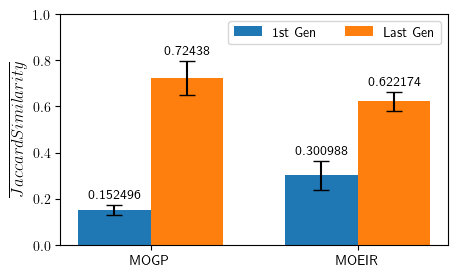

In [42]:
def IC_95(std, cant_items):
    
    return std * 1.96 / math.sqrt(cant_items)



species = ("MOGP", "MOEIR" )

methods_means = {
    '1st Gen': (df_mogp_js_1st['mean_js'][0], df_moeir_js_1st['mean_js'][0]),
    'Last Gen': (df_mogp_js['mean_js'][0], df_moeir_js['mean_js'][0]),
}


std = [(IC_95(df_mogp_js_1st['std_js'][0],df_mogp_js_1st['count_js'][0]), IC_95(df_moeir_js_1st['std_js'][0], df_moeir_js_1st['count_js'][0] )),
       (IC_95(df_mogp_js['std_js'][0], df_mogp_js['count_js'][0]), IC_95(df_moeir_js['std_js'][0], df_moeir_js['count_js'][0] )) ]
print(std)
x = np.arange(len(species))  # the label locations
width = 0.35  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(1, 1, figsize=(5, 3))

for attribute, measurement in methods_means.items():
    
    offset = width * multiplier
    #axs.bar('mogp', t['mean_gr'], yerr=t['std_gr'], capsize=6)
    rects = ax.bar(x + offset, measurement, width, yerr=std[multiplier], label=attribute, capsize=6)
    ax.bar_label(rects, padding=3)
    multiplier += 1


ax.set_ylabel(r'$$\overline{Jaccard Similarity}$$',fontsize=12)

ax.set_xticks(x + width / 2)
ax.set_xticklabels(["MOGP", "MOEIR"])



ax.legend(loc='upper right', ncol=2)
ax.set_ylim(0, 1)
plt.savefig(dir_path+"mogp_vs_moeir_jsi.svg")
plt.show()